In [14]:
# для импорта функций и классов из папки с лекциями нам нужно добавить путь в файлу с лекцией
import sys
sys.path.append('../../../bin') # поднимаемся на три папки вверх и переходим в папку bin
from Lection_006 import Stress_strain, Mech_properties
import numpy as np
import matplotlib.pyplot as plt

In [15]:
load_stroke_data = np.loadtxt ('3_20.csv',delimiter=',', encoding='utf-8-sig')
#load_stroke_data = load_stroke_data [:, 1:] # удаляем первый столбец (это время, насколько я понял)

In [16]:
# размеры образца
d0 = 9.2 # диаметр
L0 = 15 # начаьная длина образца
Le = 4.14 # конечная длина образца

# плащадь сечения образца
A0 = (np.pi*d0**2)/4


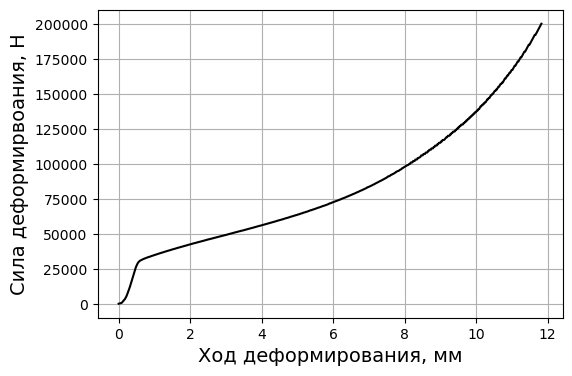

In [17]:
# Создаем объект класса Stress_strain
stress_strain = Stress_strain (load_stroke_data[:, 0], load_stroke_data[:,1], L0, A0, Le=Le)

# посмотрим на график силы по ходу деформирвоания
stress_strain.plot_graph(stress_strain.stroke, stress_strain.load, 'Ход деформирования, мм', 'Сила деформирвоания, Н')

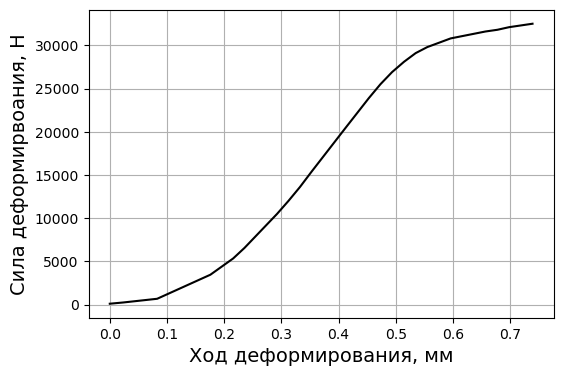

In [18]:
# посмотрим на упруго-пластическую часть графика
stress_strain.plot_graph(stress_strain.stroke[:25], stress_strain.load[:25], 'Ход деформирования, мм', 'Сила деформирвоания, Н')

In [19]:
# попробуем посчитать жесткость испытательной машины
_ = stress_strain.get_stifness()
print (f'Жесткость испытательной машины: {stress_strain.k}, Н/мм ')

Жесткость испытательной машины: 206910.82143596117, Н/мм 


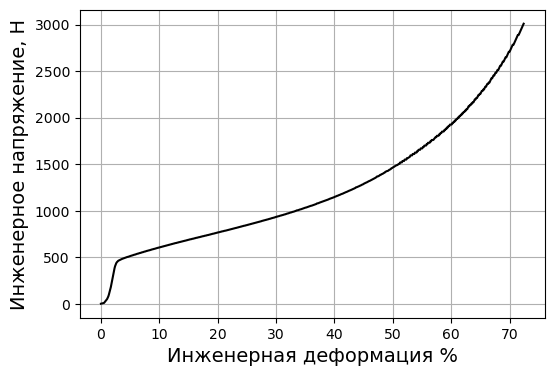

In [20]:
# посчитаем инженерные напряжения/деформации и посмотрим на график
_ = stress_strain.get_strain_eng() # отдельная переменная нам не нужно, так так массив с инженерной деформацией 
                                    # будет храниться в переменной класса
_ = stress_strain.get_stress_eng()

# посмотрим на график
stress_strain.plot_graph(stress_strain.strain_eng, stress_strain.stress_eng, 'Инженерная деформация %', 'Инженерное напряжение, Н')


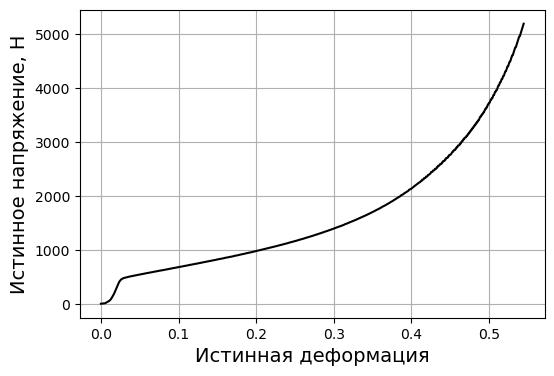

In [21]:
# посчитаем истинные напряжения/деформации и посмотрим на график
_ = stress_strain.get_strain_true() 
_ = stress_strain.get_stress_true()

# посмотрим на график
stress_strain.plot_graph(stress_strain.strain_true, stress_strain.stress_true, 'Истинная деформация', 'Истинное напряжение, Н')


    Предел прочности и равномерное удлинение мы определить по результатам испытания образца 
    на сжатие не сможем, так что ограничимся пределом текучести и модулем Юнга

## Расчет модуля Юнга и предела текучести пока не получется провести, т.к. очень большая доля выборки зазора в линейной части графика.
## Посмотрите, пожалуйста, конечную высоту образца. Попробуем понять какова величина выборки зазора.

In [22]:
# На данном этапе предел текучести давайте выберем визуально. Для этого посмотрим на данные поближе
mech_properties.plot_graph(mech_properties.strain_eng[:25], mech_properties.stress_eng[:25], 'Инженерная деформация, %', 'Инженерное напряжение, МПа')

NameError: name 'mech_properties' is not defined

In [ ]:
# Примим предел текучести yield_stress равным 225 МПа

# Создаем объект класса Flow_stress
flow_stress = Flow_stress(mech_properties.strain_eng, mech_properties.stress_eng, yield_stress = 225)

In [ ]:
# посчитаем истинные напряжения и деформации
_ = flow_stress.get_strain_true()
_ = flow_stress.get_stress_true()

# посмотрим что получилось
flow_stress.plot_graph(flow_stress.strain_true, flow_stress.stress_true,  'Истинная деформация', 'Истинное напряжение, МПа')